# Project: Read The Text

**Description:** A blurry image was received and appropriate methods for image deblurring were found. The strengths and limitations of the different methods were analyzed. Blurring is a source of image degradation in many applications e.g., medical imaging, microscopy, space observations, and feature recognition.
<br/>

**Goal:** Apply deconvolution techniques on the target image to an extent were information concealed by blur and noise can be read. 

## Import Libraries

In [3]:
from functions import *
import matplotlib.pyplot as plt
%matplotlib inline

## Load Target Image

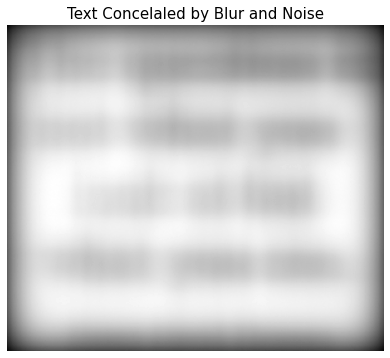

In [4]:
data = sc.loadmat("matrices.mat")
Ar = data.get("Ar")
Ac = data.get("Ac")
B = data.get("B")

plt.figure(figsize=(10,6))
plt.title('Text Concelaled by Blur and Noise', fontsize=15)
plt.axis('off')
plt.imshow(B, cmap = 'gray')

## The Blurr Model
<br/>
<div style="text-align: justify">  
Two of the most important and ubiquitous sources of image degradation are noise and blur.
Blur is the spatial redistribution of image intensities. When redistribution follows the same spatial pattern at all image location, the blurred image $f$ can modelled by the convolution of the original sharp object $g$ with a blurring spatially-invariant medium called blur kernel or point spread function (PSF) $h$, in addition to a random additive noise $n$ : 
<br/>
<br/>
\begin{equation}
    f=g*h+n
\end{equation}
<br/>
Methods that aim at a computational (approximate) inversion of the blur process are called deconvolution.
    </div>

## The Point Spread Function (PSF)
<br/>
<div style="text-align: justify">  
The point spread function (PSF) is a description of the degree to which an image is blurred (spread). 
    
    and is convolved with a hypothetical sharp image S to get B, where both the S (which is to be recovered) and the point spread function K are unknown. This is an example of an inverse problem. In almost all cases, there is insufficient information in the blurred image to uniquely determine a plausible original image, making it an ill-posed problem. In addition the blurred image contains additional noise which complicates the task of determining the original image. This is generally solved by the use of a regularization term to attempt to eliminate implausible solutions. This problem is analogous to echo removal in the signal processing domain. Nevertheless, when coherent beam is used for imaging, the point spread function can be modeled mathematically.[1] By proper deconvolution of the point spread function K and the blurred image B, the blurred image B can be deblurred (unblur) and the sharp image S can be recovered.The aim of this project is to deblur an image so that the text in said image can be read. 
First, an inverse filter was applied on the image, yet this naïve approach did not make the text readable. 
Therefore, the Wiener filter was used and this revealed the large quote in the image. However, the author's name in the bottom of the image was still unreadable. 
To solve this issue, the Tikhonov regularization method was used and the regularization parameter was optimized. Hereafter, the image was post processed. 
The strengths and limitations of the different methods utilised were analyzed and finally the text in the image was made readable. 
<br/>

    </div>

In [5]:
psf = create_psf(B, Ar, Ac)

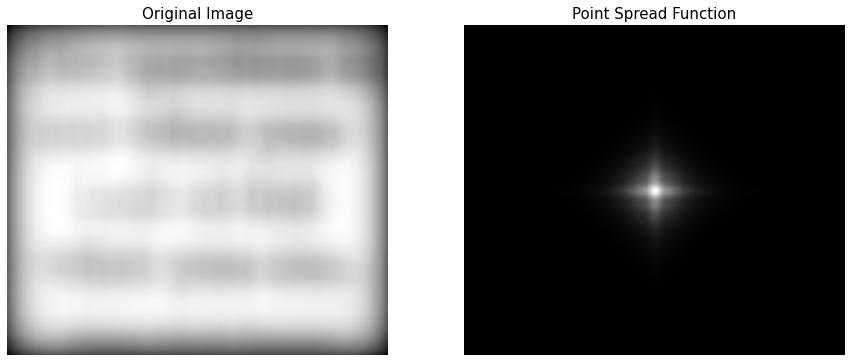

In [6]:
compare_2_imgs (B,psf, title1 = 'Original Image', title2 = 'Point Spread Function')

### The Naïve Inverse Solution
<br/>
<div style="text-align: justify">  
In order to recover a sharp image from the observed blurred one, several methods were tackled in literature.
We start with basic naive inverse filter by first assuming that the noise can be neglected thus the blur model is reduced to $f=g*h$.
We apply then the Fourier Transform to simply the computation $\hat{f}=\hat{g}*\hat{h}$. One can simply observe that 
<br/>
<br/>
\begin{equation}
    \hat{u}=\frac{\hat{f}}{\hat{h}}
\end{equation}
<br/>
If $\hat{h}$ is known, then we can easily compute $\hat{u}$ to recover the original image $g$ or an approximation of it $u$.
However, in most cases $\hat{h}$ possesses zeroes which represent frequencies which are deleted by blurring with $h$ and must not be present in a noise-free blurring process. $|\hat{h}|$ is still very small in the vicinity of its zeroes which yields tremendous noise amplification rendering the procedure extremely unstable.
<br/>   
    </div>

In [7]:
deblurred_inverse = inverse_filter(B, psf)

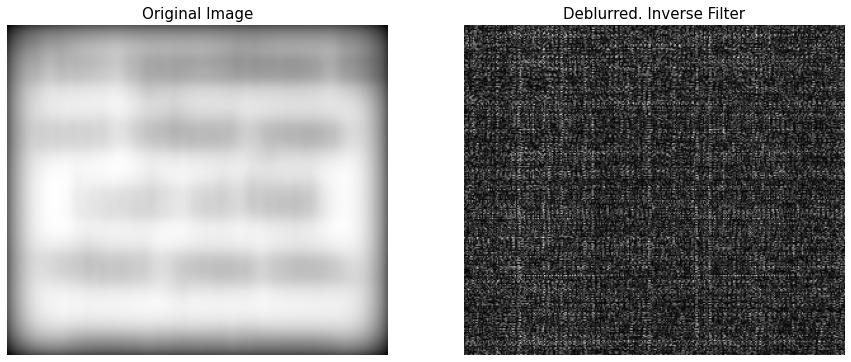

In [8]:
compare_2_imgs (B, deblurred_inverse, title1 = 'Original Image', title2 = 'Deblurred. Inverse Filter')

### Wiener Filter
<br/>
<div style="text-align: justify"> 
An advanced regularization technique of inverse filtering that handles these limitations is Wiener Filter
<br/>
<br/>
\begin{equation}
    \hat{u} = \frac{1}{|\hat{h}|}. \frac{|\hat{h}|^2}{|\hat{h}|^2 + H^2}. \hat{f}
\end{equation}
<br/>
where $H$ is the inverse of $\mathrm{SNR}$. Wiener filter displays better stability than the inverse filtering. It has properties of a band-pass and is therefore even well-suited to deal with moderate noise. 
<br/>   
    </div>

In [11]:
deblurred_wiener = wiener_filter(B, psf, 20000)

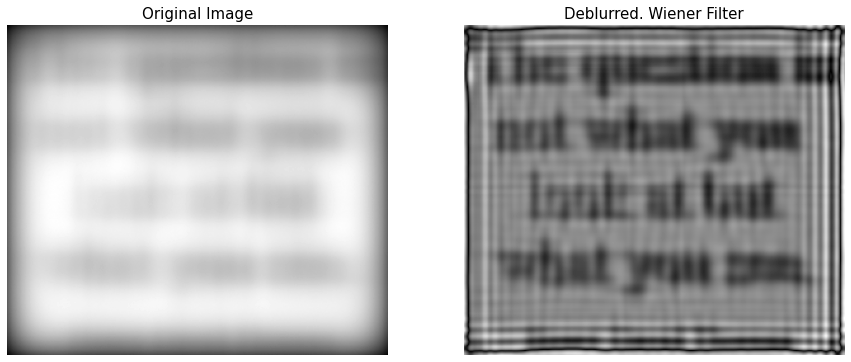

In [12]:
compare_2_imgs (B, deblurred_wiener, title1 = 'Original Image', title2 = 'Deblurred. Wiener Filter')

### Tikhonov Filter

explanation....

In [9]:
deblurred_tikhonov = tikhonov(B, Ar, Ac, 0.002)

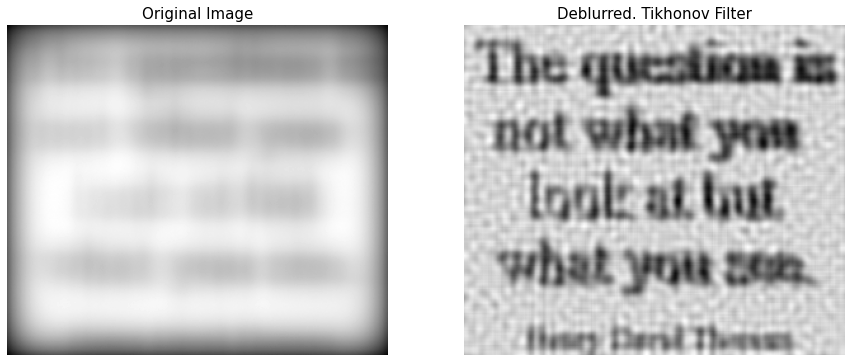

In [10]:
compare_2_imgs (B, deblurred_tikhonov, title1 = 'Original Image', title2 = 'Deblurred. Tikhonov Filter')

## Post-Processing
<br/>
<div style="text-align: justify"> 
$Thresholding$: why bitches?
    
    Explanation of the prost-processing.
<br/>   
    </div>

In [11]:
deblurred_tikhonov = normalize_uint8(deblurred_tikhonov)
deblurred_tikhonov_PP = postprocess(deblurred_tikhonov)

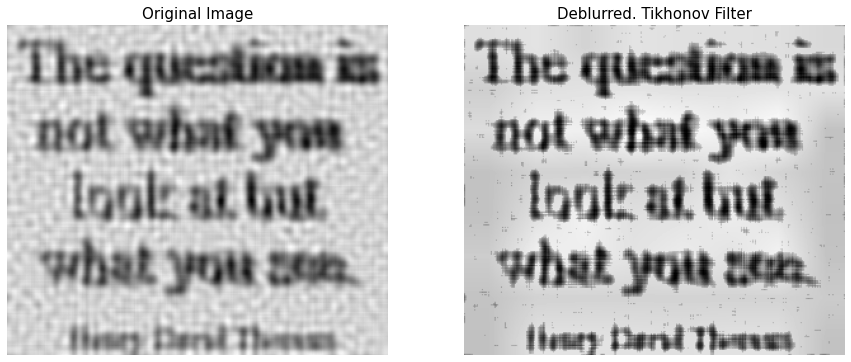

In [13]:
compare_2_imgs (deblurred_tikhonov, deblurred_tikhonov_PP, title1 = 'Deblurred. Tikhonov Filter', title2 = 'Deblurred. Tikhonov Filter')

## References